# Analysis
In dit notebook zullen met analyse doen op de dataframe's die verkregen zijn in het notebook 'Data collection & munging'.

In [1]:
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

Eerst moeten we de benodigde datasets inlezen en de nan waardes eruit halen

In [2]:
balbezitCambuur = pd.read_csv('datasets/bewerkte-datasets/Balbezit NEC-Cambuur.csv', index_col=0)
balbezitRoda = pd.read_csv('datasets/bewerkte-datasets/Balbezit NEC-Roda.csv', index_col=0)
balbezitPEC = pd.read_csv('datasets/bewerkte-datasets/Balbezit PEC-NEC.csv', index_col=0)
balbezitUtrecht = pd.read_csv('datasets/bewerkte-datasets/Balbezit Utrecht-NEC.csv', index_col=0)
balbezitPEC['position'] = balbezitPEC["x"].map(str) + ',' + balbezitPEC["y"].map(str)

headers = ['GPStijd', 'dt(ms)', 'lat', 'long', 'snelheid(m/s)', 'acc_x(g-force)', 'acc_y,acc_z', 'gyro_x(deg/s)', 'gyro_y', 'gyro_z', 'mag_x(-)', 'mag_y', 'mag_z', 'NOTOFINTEREST', 'heart rate (bpm)']
speler = pd.read_csv('datasets/gps/20160410 FC Utrecht - NEC/00fa2184833d4b61a53820b0390fb3c6.txt', names = headers)

speler = speler.iloc[speler['lat'].dropna().index.values]
speler['GPStijd'] = speler['GPStijd'].astype(str).str[:-3]
speler = speler.drop_duplicates('GPStijd')

# Betrouwbaarheid
Om de betrouwbaarheid van de dataset te berekenen maken we gebruik van de volgende twee technieken:
-  Kurtosis
-  Skewness

## Kutosis
In de kansrekening en de statistiek is het begrip kurtosis of welving (gewelfdheid), (ook wel platheid genoemd) een maat voor de 'piekvormigheid' van een kansverdeling. Zowel de parameter zelf als de schatter daarvan worden met kurtosis aangeduid. Een hoge kurtosis wijst op een verdeling met een sterke piek. Dit houdt in dat een relatief groot deel van de variantie veroorzaakt wordt door zeldzame extreme waarden. Een lage kurtosis wijst op een platte verdeling. Hier wordt de variantie voornamelijk veroorzaakt door een groter deel minder extreme waarden.

## Skewness
Het begrip scheefheid (Engels: skewness) is in de statistiek de meestgebruikte maat van asymmetrie. Scheefheid is zowel te berekenen voor een kansverdeling als een steekproef.

Je kunt deze twee waardes berekenen met de volgende formule:
<img src="./betrouwbaarheid.jpg" width=300>

## Hoe weet je wanneer een kolom betrouwbaar is?
Beide technieken kijken of er grote uitwijkingen zijn in het patroon van de gegevens. Als de waarde tussen de -1 en 1 ligt kan je zeggen dat de kolom betrouwbaar is.

## Betrouwbaarheid van de dataset van een speler

In [3]:
print(speler.skew())

GPStijd             0.059501
dt(ms)              2.042834
lat                -1.029026
long               -1.116114
snelheid(m/s)       2.347953
acc_x(g-force)      1.568531
acc_y,acc_z        -0.470557
gyro_x(deg/s)      -0.529636
gyro_y              0.392997
gyro_z             -0.053275
mag_x(-)           -0.525530
mag_y               0.000000
mag_z                    NaN
NOTOFINTEREST            NaN
heart rate (bpm)         NaN
dtype: float64


Conclusie: de betrouwbaarheid van deze dataset is niet heel betrouwbaar, de waardes liggen echter niet heel ver buiten de marge

In [4]:
print(speler.kurtosis())

GPStijd             -1.130410
dt(ms)               2.173698
lat                  0.581863
long                 1.343365
snelheid(m/s)        6.720797
acc_x(g-force)      13.475049
acc_y,acc_z          2.257875
gyro_x(deg/s)       17.361170
gyro_y              11.618458
gyro_z              23.108675
mag_x(-)            15.585675
mag_y                0.000000
mag_z                     NaN
NOTOFINTEREST             NaN
heart rate (bpm)          NaN
dtype: float64


Conclusie: de betrouwbaarheid van deze dataset is niet heel betrouwbaar, sommige waardes liggen zelfs boven de 10 dit betekent dat deze kolommen niet betrouwbaar zijn

## Betrouwbaarheid van de balbezit datasets

### NEC tegen Cambuur

In [5]:
print(balbezitCambuur.skew())

start    0.170092
end      0.169724
x       -0.041378
y        0.084783
dtype: float64


Conclusie: deze dataset is erg betrouwbaar alle waarden liggen heel dicht bij de 0

In [6]:
print(balbezitCambuur.kurtosis())

start   -1.232860
end     -1.233326
x       -0.695754
y       -0.761221
dtype: float64


Conclusie: deze dataset is redelijk betrouwbaar, de x en y kolommen liggen binnen de marge. De start en end kolom liggen hier net iets buiten.

### NEC tegen Roda

In [7]:
print(balbezitRoda.skew())

start    0.091113
end      0.090761
x        0.009563
y       -0.189711
dtype: float64


Conclusie: deze dataset is erg betrouwbaar alle waarden liggen heel dicht bij de 0

In [8]:
print(balbezitRoda.kurtosis())

start   -1.305545
end     -1.305853
x       -1.203952
y       -0.548695
dtype: float64


Conclusie: deze dataset is neit heel betrouwbaar 3 van de 4 kolommen liggen boven de 1/-1

### NEC tegen Utrecht

In [9]:
print(balbezitUtrecht.skew())

start    0.016807
end      0.017389
x       -0.053701
y        0.070737
dtype: float64


Conclusie: deze dataset is erg betrouwbaar alle waarden liggen heel dicht bij de 0

In [10]:
print(balbezitUtrecht.kurtosis())

start   -1.135588
end     -1.135539
x       -0.842808
y       -0.643642
dtype: float64


Conclusie: deze dataset is redelijk betrouwbaar, de x en y kolommen liggen binnen de marge. De start en end kolom liggen hier net iets buiten.

### NEC tegen PEC Zwolle

In [11]:
print(balbezitPEC.skew())

start    0.050417
end      0.050409
x       -0.131812
y       -0.005022
dtype: float64


Conclusie: deze dataset is redelijk betrouwbaar omdat bijna alle waarden binnen de 1 en -1 marge liggen

In [12]:
print(balbezitPEC.kurtosis())

start   -1.143034
end     -1.143310
x       -0.858988
y       -0.898045
dtype: float64


Conclusie: deze dataset is redelijk betrouwbaar, de x en y kolommen liggen binnen de marge. De start en end kolom liggen hier net iets buiten.

# Machine Learning

Eerst willen we kijken of we de spelers in verdedigers, middevelders en aanvallers kunnen verdelen hiervoor gebruiken we k-means en geven we aan dat we 3 clusters willen hebben

In [13]:
X_train, X_test, y_train, y_test = train_test_split(balbezitPEC['x'], balbezitPEC['y'], random_state=33)

k_means = KMeans(n_clusters=3)

In [14]:
k_means.fit(X_train.values.reshape(-1, 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
k_means.predict(X_test.values.reshape(-1, 1))

array([1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 0, 1,
       2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0,
       2, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1,
       0, 2, 0, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 2])

Conclusie: omdat alle waarden ongeveer even vaak vooorkomen kunnen we zeggen dat we dit in kunnen delen in verdedigers, middenvelders en aanvallers

[[ 3.        ]
 [ 2.        ]
 [ 0.98360656]]


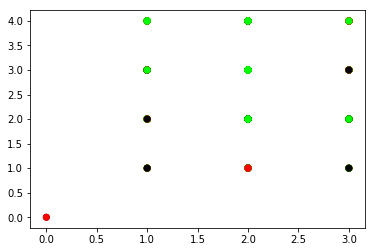

In [16]:
print(k_means.cluster_centers_)
colormap = np.array(['red', 'lime', 'black'])
plt.scatter(balbezitPEC['x'], balbezitPEC['y'], c=colormap[k_means.labels_])
plt.show()

In [17]:
predY = np.choose(k_means.labels_, [1, 0, 2]).astype(np.int64)
sm.accuracy_score(y_test, predY[:200])

0.095000000000000001